# 🛍️ Customer Segmentation
### By Vanshika Gupta

This notebook performs customer segmentation on mall customers using unsupervised machine learning (K-Means). It includes EDA, feature preprocessing, cluster formation, visualization, and business insights.

##### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##### Load the Dataset

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##### Exploratory Data Analysis

In [7]:
df.shape

(200, 5)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.drop(columns= 'CustomerID', inplace= True)

In [10]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
(df == ' ').sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [15]:
df.describe(include = 'number')

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


##### Feature Selection

In [17]:
df_cat = df.select_dtypes(include = 'object')
df_cat.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [18]:
df_num = df.select_dtypes(include = np.number)
df_num.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


##### EDA Visuals

Numeric Distribution

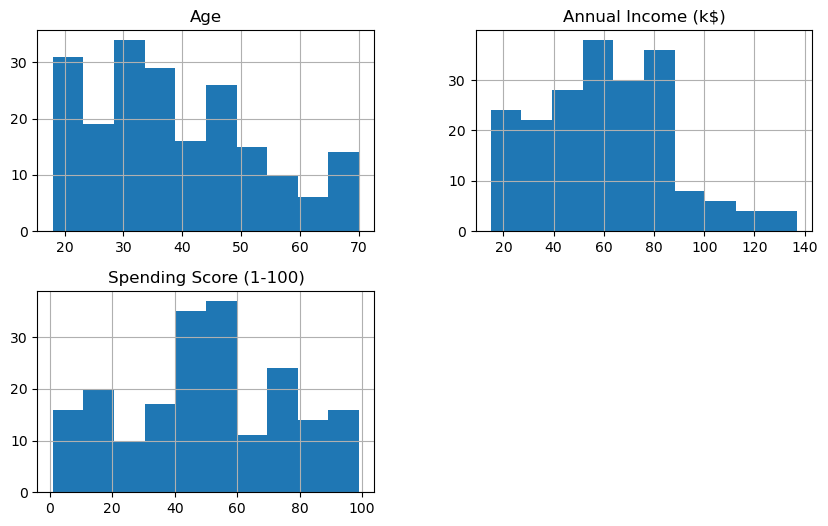

In [21]:
df.hist(figsize=(10,6))
plt.show()

Outliers

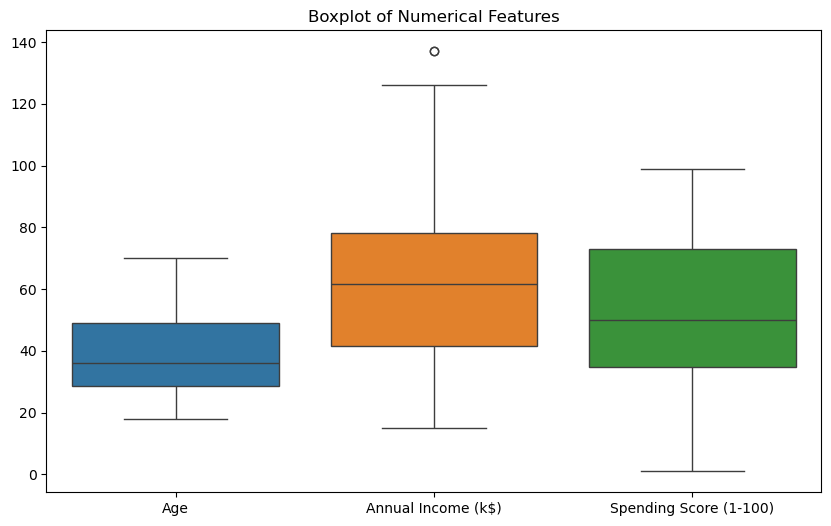

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df_num)
plt.title("Boxplot of Numerical Features")
plt.show()

Multicollinearity

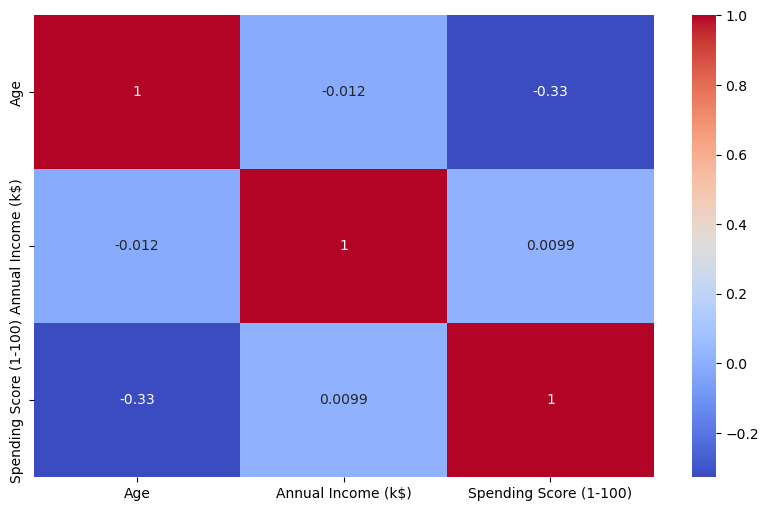

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

##### Feature Scaling

In [27]:
df_scaled = StandardScaler().fit_transform(df_num)

In [28]:
df_scaled = pd.DataFrame(df_scaled, columns= df_num.columns)

## K-Means Clustering

In [30]:
WCSS = []              
silhouette = []
for k in range(2,11):
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    WCSS.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

##### Find Optimal K

Elbow Plot

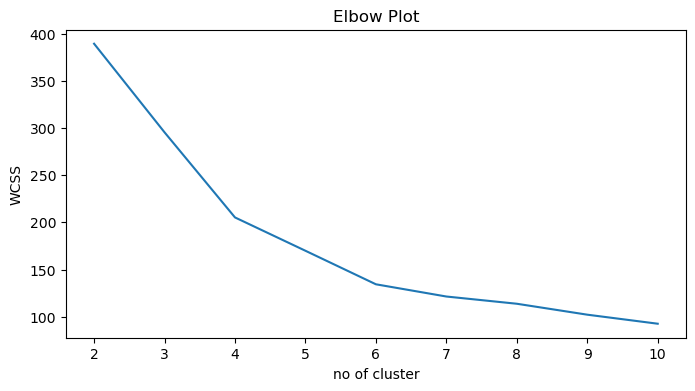

In [33]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11), WCSS)
plt.title('Elbow Plot')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

Silhouette Score

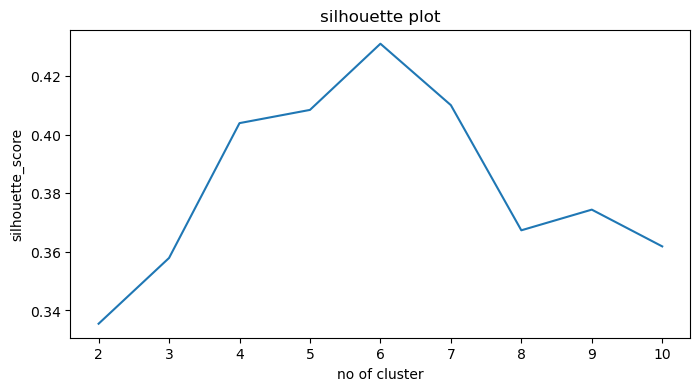

In [35]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11), silhouette)
plt.title('silhouette plot')
plt.xlabel('no of cluster')
plt.ylabel('silhouette_score')
plt.show()

##### Fit Final KMeans Model

In [37]:
kmeans = KMeans(n_clusters= 6, random_state= 42)
df['cluster'] = kmeans.fit_predict(df_scaled)

##### Calculate silhouette score

In [39]:
score = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score for K=6: {score:.4f}")

Silhouette Score for K=6: 0.4311


In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [41]:
df['cluster'].value_counts()

cluster
0    45
3    40
1    39
4    30
2    25
5    21
Name: count, dtype: int64

### Cluster Profiling

In [43]:
df.groupby('cluster').agg({
    'Age':'mean',
    'Annual Income (k$)':'mean',
    'Spending Score (1-100)':'mean'
})

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,56.333333,54.266667,49.066667
1,32.692308,86.538462,82.128205
2,25.560000,26.480000,76.240000
3,26.125000,59.425000,44.450000
4,44.000000,90.133333,17.933333
5,45.523810,26.285714,19.380952


#### Assign segment names based on cluster profiling

In [45]:
cluster_names = {
    0: "Mature Average Spenders",
    1: "Premium High Spenders",
    2: "Young Budget High Spenders",
    3: "Potential Loyalists",
    4: "High-Income Low Spenders",
    5: "Low-Income Minimal Spenders"
}

df['Segment'] = df['cluster'].map(cluster_names)

## PCA 2D Visualization

In [47]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

df['PC1'] = pca_data[:,0]
df['PC2'] = pca_data[:,1]

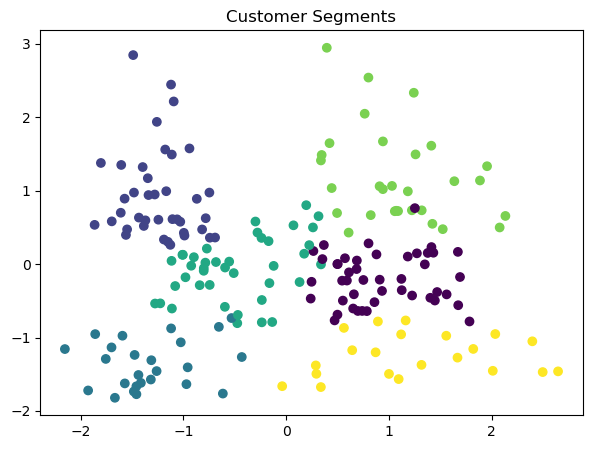

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(df['PC1'], df['PC2'], c=df['cluster'])
plt.title('Customer Segments')
plt.show()

## Visualization

 Income vs Spending Score

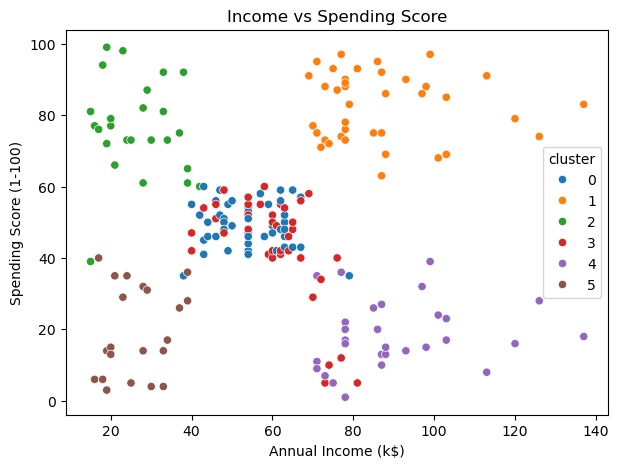

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title("Income vs Spending Score")
plt.show()

Age vs Spending Score

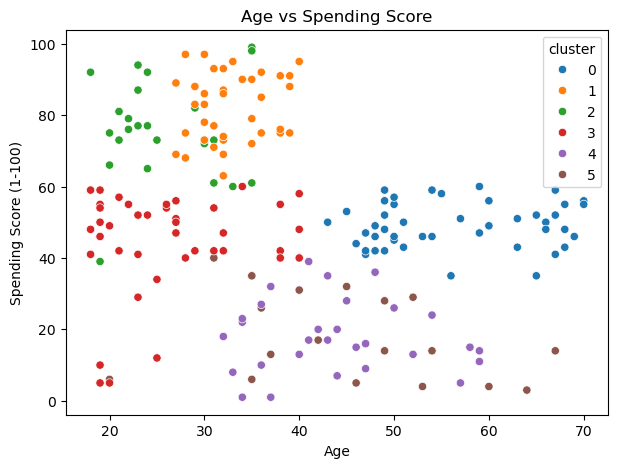

In [53]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title("Age vs Spending Score")
plt.show()

Count of customers per cluster

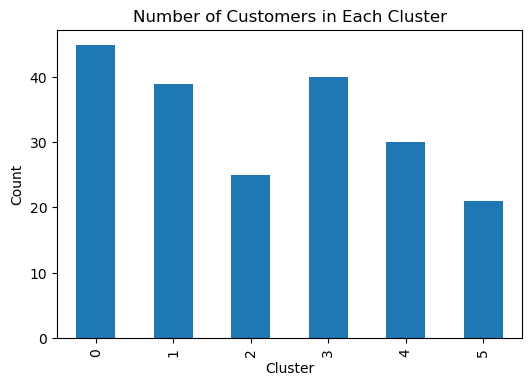

In [55]:
plt.figure(figsize=(6,4))
df['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Boxplots by cluster

<Figure size 1200x600 with 0 Axes>

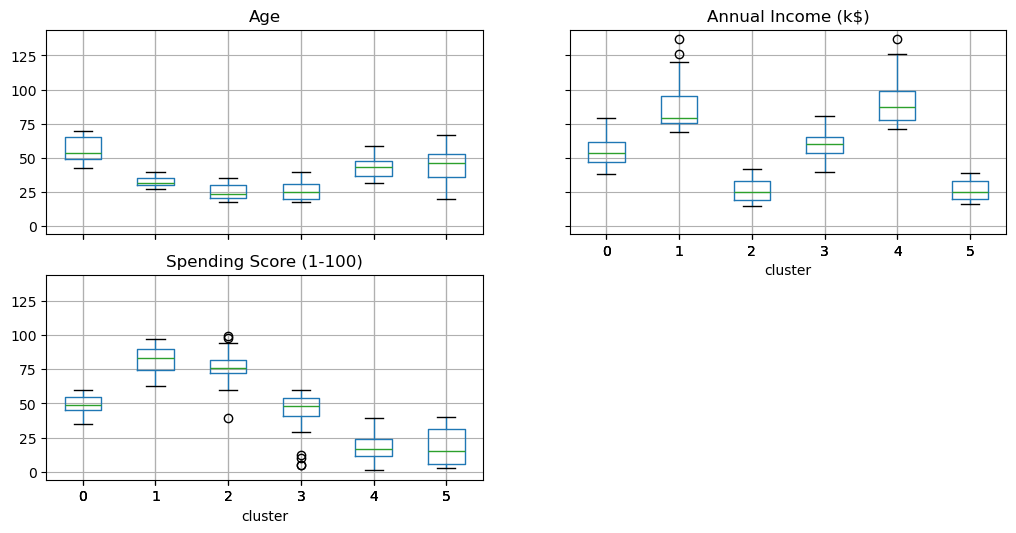

In [57]:
plt.figure(figsize=(12,6))
df.boxplot(column=['Age','Annual Income (k$)','Spending Score (1-100)'], by='cluster', figsize=(12,6))
plt.suptitle("")
plt.show()

##### Final Data Preview

In [59]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Segment,PC1,PC2
0,Male,19,15,39,2,Young Budget High Spenders,-0.615720,-1.763481
1,Male,21,15,81,2,Young Budget High Spenders,-1.665793,-1.820747
2,Female,20,16,6,5,Low-Income Minimal Spenders,0.337862,-1.674799
3,Female,23,16,77,2,Young Budget High Spenders,-1.456573,-1.772430
4,Female,31,17,40,5,Low-Income Minimal Spenders,-0.038465,-1.662740


##### Export Final Dataset

In [61]:
df.to_csv("customer_segments.csv", index=False)

# 📌 Business Insights

### **Cluster 0 – Mature Average Spenders**  
Older customers with moderate income and average spending. Good candidates for personalized recommendations and seasonal offers.

### **Cluster 1 – Premium High Spenders**  
Young, high-income customers with very high spending. Ideal for premium loyalty programs and exclusive offers.

### **Cluster 2 – Young Budget High Spenders**  
Young customers with low income but high spending. Effective targets for trendy deals and digital marketing campaigns.

### **Cluster 3 – Potential Loyalists**  
Young, mid-income customers with medium spending. Can be converted into loyal high-value customers through personalized engagement.

### **Cluster 4 – High-Income Low Spenders**  
Customers with high income but very low spending. Strong opportunities for cross-selling and upselling premium products.

### **Cluster 5 – Low-Income Minimal Spenders**  
Mid-age customers with low income and minimal spending. Best targeted with budget-friendly or bundled offers.

# ✔ Conclusion

This project successfully segmented customers into 6 distinct groups using K-Means clustering.  
The resulting segments highlight clear differences in customer behavior, purchasing power, and spending patterns.  
These insights can help marketing teams build targeted strategies, enhance customer engagement and optimize promotional efforts.